<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def scatterplot(X_,Y_,title_,namefile_ ):
    fig, ax1 = plt.subplots(figsize=(4,4))
    CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('Componente principal 1',  color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('Componente principal 2',  color=LETRASNARA, fontsize='large')
    plt.scatter(X_, Y_, alpha=0.3)
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)
    plt.savefig(namefile_, transparent=True)
    plt.show()

In [4]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
def print_serie(serie_,title_,ytitle_,xtitle_,namefile_):
    fig, ax1 = plt.subplots(figsize=(7,4))
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel(xtitle_, color=LETRASNARA, fontsize='large')
    ax1.set_ylabel(ytitle_, color=LETRASNARA, fontsize='large')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)    
    plt.plot(serie_)
    plt.savefig(namefile_, transparent=True)         
    plt.show()

In [5]:
#https://drive.google.com/drive/folders/1Gj3XK9kM-lE18uBMe3qrZOGEm8yAI8i9
#https://www.codegrepper.com/code-examples/python/how+to+read+csv+file+from+google+drive+on+google+colab+
path        = 'https://drive.google.com/uc?export=download&id=' 
URL_Eolicas = 'https://drive.google.com/file/d/1FNMdGkhjypcGTAtPeOfw12EuAolUJ4Fh/view?usp=sharing'
URL_Demanda = 'https://drive.google.com/file/d/1KpY2p4bfVEwGRh5tJjMx9QpH6SEwrUwH/view?usp=sharing'
df = pd.read_csv(path + URL_Demanda.split('/')[-2], usecols=['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','Y'] )
dfx = df[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18']]
dfy = df[['Y']]
#dfx  = pd.read_csv(path + URL_Eolicas.split('/')[-2], usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35] ) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,], 1,2,3,4,5,6,7,8,9,10,11,12,13,15,
#dfx.dropna(inplace=True)
#dfx = df.iloc[:1500, :]
#dfx.head()


In [6]:
X = dfx.to_numpy()
y = dfy.to_numpy()
X = StandardScaler().fit_transform(X)
## Crea conjuntos de datos de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.7) #, random_state = 5


In [ ]:
sns.set_theme(style = "ticks")
sns.set(font_scale=1)
sns.pairplot( dfx.iloc[0:20, :] , height=3) 

100.00000000000003


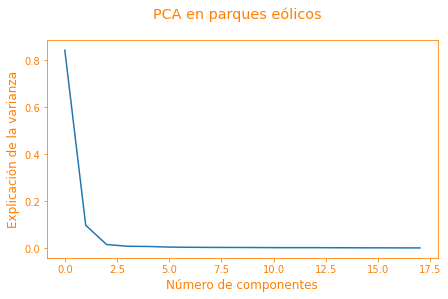

In [68]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca = PCA(0.999999999) 
pca.fit(X_train)
X_pca = pca.transform(X_train)
X_pcat = pca.transform(X_test)
print(sum(pca.explained_variance_ratio_ * 100))
print_serie(pca.explained_variance_ratio_,'PCA en regresores de demanda\n','Explicación de la varianza','Número de componentes','fig_t14__variance_pca')

In [69]:
pca.components_
pca.n_components_
pca.singular_values_

array([53.23812901, 18.06937274,  7.19435639,  5.17722313,  4.85824439,
        3.86103146,  3.47052031,  3.1912256 ,  3.08722869,  2.97359153,
        2.67178691,  2.62615286,  2.59687828,  2.37759176,  2.13685949,
        2.10061666,  1.85588777,  1.73158736])

# Calculamos la regresión

In [70]:
linreg_model      = LinearRegression().fit(X_train[:, :], y_train)
linreg_prediction = linreg_model.predict(X_test)
err_mae = np.mean(np.abs(y_test - linreg_prediction))
print("MAE del modelo de regresión con datos de entrenamiento con sklearn:", err_mae)

# calculating VIF for each feature
for i in range(X_train.shape[1]):
    print(variance_inflation_factor(X_train,i))  

MAE del modelo de regresión con datos de entrenamiento con sklearn: 121.70158925925374
nan
16.946717262586326
26.946954742046398
23.364970737942606
33.364031642617284
19.85777665360346
22.713847615611826
24.104641627265455
31.415617835132394
18.1821192166196
24.196097646393497
26.213545572214684
11.505862040195858
4.2846780068106085
36.52518525594977
29.889485247673303
28.376190161748973
16.5403672881376
23.258983028078802


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [71]:
linreg_model      = LinearRegression().fit(X_pca[:, :], y_train)
linreg_prediction = linreg_model.predict(X_pcat)
errreg_mae = np.mean(np.abs(y_test - linreg_prediction))
print("MAE del modelo de regresión con datos de entrenamiento con sklearn:", errreg_mae)

# calculating VIF for each feature
for i in range(X_pcat.shape[1]):
    print(variance_inflation_factor(X_pcat,i))  

MAE del modelo de regresión con datos de entrenamiento con sklearn: 121.70158925925392
1.1178287171593706
1.1248873918569269
1.1280828859327863
1.1156048268453207
1.1950009669801633
1.182002694787991
1.1485798118805923
1.0628505685319614
1.0801179759251092
1.0658875819034566
1.1945092869208596
1.1067739104198298
1.0853089329264471
1.0311464385200302
1.1648162314819202
1.1413696615987285
1.1558356757375559
1.1709305290784742


In [ ]:
sns.set_theme(style = "ticks")
sns.set(font_scale=1)
sns.pairplot(pd.DataFrame(X_pcat).iloc[0:20, :], height=3)

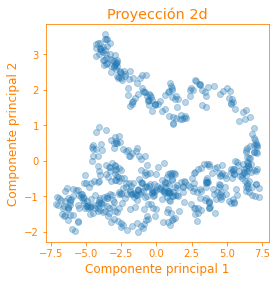

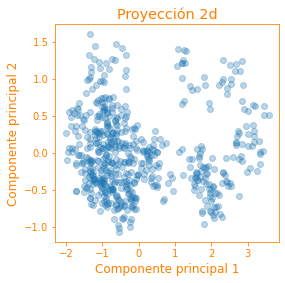

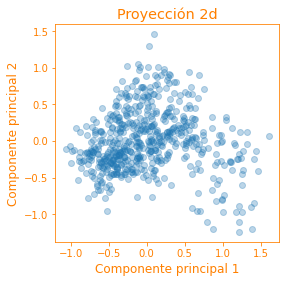

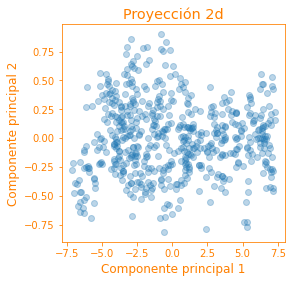

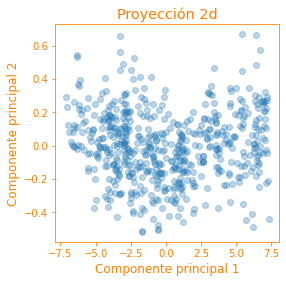

In [10]:
## Proyección de 10 dimensiones 
pca = PCA(n_components = 12)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12',])
scatterplot(principalDf['PC1'],principalDf['PC2'],'Proyección 2d','fig_t14_Proy2D_1_2')
scatterplot(principalDf['PC2'],principalDf['PC3'],'Proyección 2d','fig_t14_Proy2D_2_3')
scatterplot(principalDf['PC3'],principalDf['PC4'],'Proyección 2d','fig_t14_Proy2D_3_4')
scatterplot(principalDf['PC1'],principalDf['PC6'],'Proyección 2d','fig_t14_Proy2D_1_6')
scatterplot(principalDf['PC1'],principalDf['PC12'],'Proyección 2d','fig_t14_Proy2D_1_12')

In [11]:
def PCAfromScratch(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)

    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #Step-4 Ordering
    idx                 = np.argsort(eigen_values)[::-1]
    print(idx)
    sorted_eigenvalue   = eigen_values[idx]
    sorted_eigenvectors = eigen_vectors[:,idx]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced, eigen_values, 

In [12]:
#Applying it to PCA function
mat_reduced ,eigen_values, = PCAfromScratch(X , 12)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced)
principal_df


[17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.598026,0.912949,0.752409,0.713978,0.022649,-0.007495,-0.022037,0.318160,-0.303551,0.255477,0.108072,0.135600
1,-0.742100,1.015275,0.689037,0.904083,-0.021475,0.023846,-0.203283,0.121392,-0.155629,0.452719,0.126879,0.322789
2,-0.983421,0.867777,0.551197,0.949123,-0.049680,0.043048,-0.055927,0.084769,0.131396,0.298376,0.029264,0.252983
3,-1.190426,0.877608,0.543978,0.644281,-0.058860,-0.090205,0.152465,0.025415,0.104236,-0.136131,-0.071127,0.100298
4,-1.079222,0.979436,0.564403,0.453363,-0.192928,-0.302365,0.128677,-0.359147,-0.002343,-0.311500,-0.085790,0.223305
...,...,...,...,...,...,...,...,...,...,...,...,...
571,-1.942460,-1.219012,1.255551,-0.971341,0.873665,0.084815,-0.005489,0.255370,-0.123108,0.110559,0.072428,0.225521
572,-1.764630,-1.300275,1.371033,-0.901983,0.898811,0.033585,-0.093054,0.276018,0.051745,0.083899,0.181996,0.118326
573,-1.842400,-1.184668,1.008705,-0.967553,0.841579,-0.035729,0.002416,0.111566,0.261457,-0.050768,0.064735,0.209580
574,-2.015825,-1.259498,0.698565,-0.957936,0.505677,-0.024229,0.080122,-0.152605,0.380927,0.003499,-0.184958,0.381979


[Eliminar multicolinealidad con PCA](https://medium.com/@awabmohammedomer/principal-component-analysis-pca-in-python-6897664f97d6#:~:text=PCA%20aims%20to%20reduce%20dimensionality,original%20data%20with%20less%20noise.)

In [13]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html?highlight=factor%20analysis#
factor = FactorAnalysis(n_components=2, random_state=0)
X_factor = factor.fit_transform(X)
X_factor.shape

(576, 2)

[link text](https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f)

Análisis de componentes principales es un métodos de reducción de dimensiones que puede ser usado paraescoger un subconjunto de variables que expliquen la mayor varianza, es decir que representen en mayor medida los datos originales. Las variables eliminadas serán redundates con otras. Además otras variables isntéticas llamadas latentes o componentes en el PCA pueden explicar partes importantes del fenómeno. 

# 14.3.12 Hierarchical Clustering

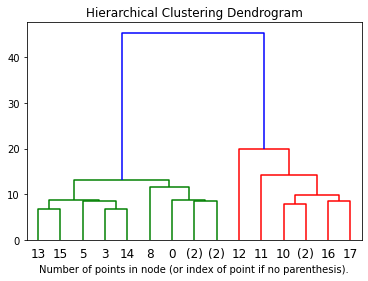

In [14]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#
#https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/cluster-observations/interpret-the-results/all-statistics-and-graphs/dendrogram/#:~:text=Interpretaci%C3%B3n,una%20l%C3%ADnea%20horizontal%20del%20dendrograma.
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters= None)

model = model.fit(X.T)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()